# A Brief Overview of Data Preprocessing for Machine Learning
## Why Data Preprocessing is necessary?
1. Quality of data is important to train the model
2. Data will never be in the desired format
3. Missing values, correlated values
4. Learning algorithms only know the numbers, therefore converting text into numbers
5. Unscaled and unstandardized data might have unacceptable prediction

## Types of Data Preprocessing
1. Checking for null values
2. Correlated feature check
3. Data molding (Encoding)
4. Splitting the data
5. Impute missing values
6. Feature Scaling
7. Label Encoding
8. One-Hot Encoding

## Python Libraries Used
1. Pandas
2. Sklearn
3. Matplotlib

In [1]:
# Install necessary libraries for data preprocessing
!pip install pandas

In [2]:
!pip install sklearn

In [3]:
!pip install matplotlib

## 1. Checking for Null Values
You can remove or impute null values <br>
df.isnull().values.any() <br>
df = df.dropna(how='any', axis=0)

In [4]:
#import data
import pandas as pd
df = pd.read_csv("Data/pima-data.csv")
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [5]:
# Now check for null values in datafram
# We'll use Pandas inbuild fundtion df.isnull().values.any()

df.isnull().values.any()

False

In [6]:
#Now if there are null values we can use first method 
#i.e removing null values by using the command df = df.dropna(how='any', axis=0)

## 2. Correlated Feature Check
This is way to understand the relationship between multiple variables and attributes in your dataset. Use of correlation can get us the following insights:
1. One or multiple attributes depend on each other.
2. Or the attributes associated with each other

### How to Handle correlation
1. Remove one of the feature
2. Apply Principle Component Analysis (PCA)

In [7]:
# To check the correlation between the features let's apply corr function

df.corr()

# After applying this fuction you can see 1.000 along the diagonal. Correlation features have range (-1 to 1)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [8]:
# After applying this fuction you can see 1.000 along the diagonal because it is showing
#correlation with itself. Correlation features have range (-1 to 1)
# Check if there is any thing close to one other than the diagonal values
# See Skin and Thickness are correlated to each other, See they have 1.00 with each other.

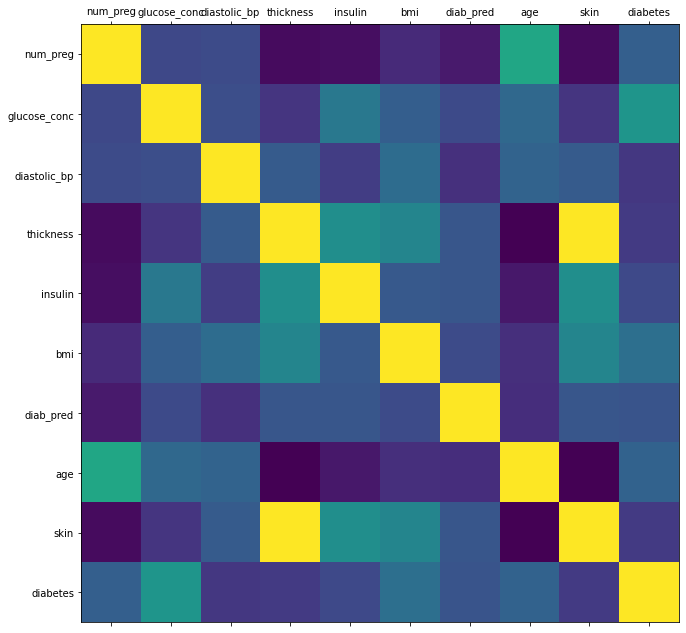

In [9]:
# Now we will plot correlation for better visualization

import matplotlib.pyplot as plt

def plotdf(df, size=11): #df: dataframe and size: horizontal and vertical size of the plot
    corr = df.corr() #dataframe correlation function
    fig, ax = plt.subplots(figsize=(size,size)) #The subplot command will call plt.figure() in the background
    ax.matshow(corr) #heatmapby matshow and colors will be according to he value of correlation
    plt.xticks(range(len(corr.columns)), corr.columns) #x tickmarks
    plt.yticks(range(len(corr.columns)), corr.columns) # y tickmarks
    
plotdf(df)

In [10]:
# You can see there is a correltion between skin and thickness, so we're going to delete skin column fron the dataframe

del df['skin']
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
5,5,116,74,0,0,25.6,0.201,30,False
6,3,78,50,32,88,31.0,0.248,26,True
7,10,115,0,0,0,35.3,0.134,29,False
8,2,197,70,45,543,30.5,0.158,53,True
9,8,125,96,0,0,0.0,0.232,54,True


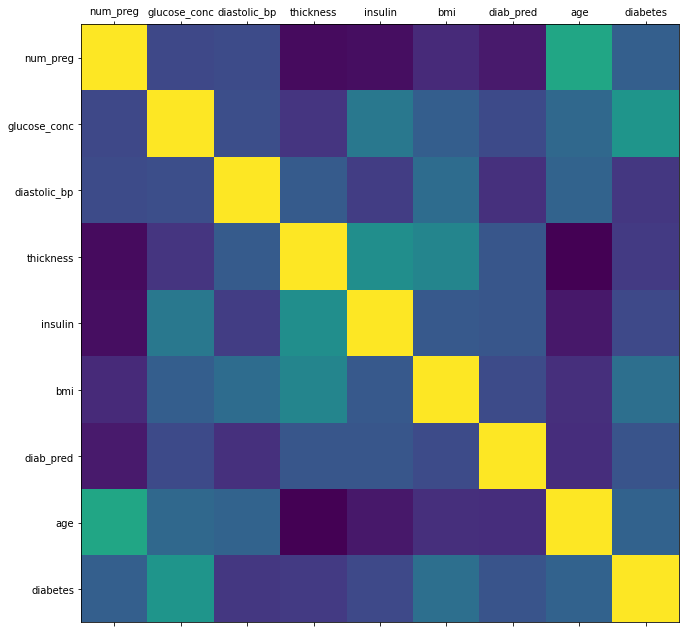

In [11]:
#You can see the skin column is removed from the dataframe
# Plot the heatmap again

plotdf(df)

In [12]:
#Now there is no correlation in the features

## 3. Data Molding (Encoding)
Changing the data into machine readable fromat so that machine can read and predict the results.

In [13]:
diab_map = {True : 1, False : 0} #key-value pair to encode the value of diabetes in the dataframe
df['diabetes'] = df['diabetes'].map(diab_map) #map function of pandas to mold the values in the dataframe
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 4. Splitting the Data
In Machine Learning algorithms we have to split the data for model training and testing purposes.
Thumb Rule (Training 70%, Testing 30%)

### Variance
Variance is the amount that estimate target function change based on the given training data

Less Training Data --> The parameter estimates have greater variance
Less Testing Data --> The performance statistics have greater variance

#### Split the data such that neiter of the variance too high

In [14]:
from sklearn.model_selection import train_test_split

feature_col = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predict_col = ['diabetes']

x = df[feature_col].values
y = df[predict_col].values
split_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_size, random_state=42)

print('{0:0.2f}% in training set'.format(float(len(x_train))/float(len(df.index))*100))
print('{0:0.2f}% in testing set'.format(float(len(x_test))/float(len(df.index))*100))




69.92% in training set
30.08% in testing set


## 5. Impute Missing Values
Replacing/removing/imputing any null valuesin the data
Let's check how much missing or zero values out data have. 


In [26]:
#How many rows have unexpected zero values
#glucose_conc	diastolic_bp	thickness	insulin	bmi	diab_pred	age	diabetes
print("Number of rows in Dataframe {0}".format(len(df)))
print("Number of rows missing in num_preg {0}".format(len(df.loc[df['num_preg'] == 0])))
print("Number of rows missing in glucose_conc {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("Number of rows missing in diastolic_bp {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("Number of rows missing in thickness {0}".format(len(df.loc[df['thickness'] == 0])))
print("Number of rows missing in insulin {0}".format(len(df.loc[df['insulin'] == 0])))
print("Number of rows missing in bmi {0}".format(len(df.loc[df['bmi'] == 0])))
print("Number of rows missing in diab_pred {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("Number of rows missing in age {0}".format(len(df.loc[df['age'] == 0])))

Number of rows in Dataframe 768
Number of rows missing in num_preg 111
Number of rows missing in glucose_conc 5
Number of rows missing in diastolic_bp 35
Number of rows missing in thickness 227
Number of rows missing in insulin 374
Number of rows missing in bmi 11
Number of rows missing in diab_pred 0
Number of rows missing in age 0


In [27]:
# Now impute with the mean
from sklearn.impute import SimpleImputer

#Impute all O readings with mean

fill_0 = SimpleImputer(missing_values=0, strategy="mean")
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## 6. Data Standardization (Feature Scaling)

Feature scaling is very important when we're dealing with the gradient descent algorithms. Feature scaling is to standardize the attributes so that they have mean value of 0 and standard deviation of 1, assuming we've a bell curve distribution of the data.

#### Exercise

Apply data standardization to the test scores so that they have relative distribution of values from the mean.<br>
z = $\frac {(x – μ)}{\sigma}$

In [28]:
import pandas as pd
exam_data = pd.read_csv("Data/exams.csv", quotechar='"')
exam_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,79,75,81
1,female,group C,associate's degree,free/reduced,none,56,65,64
2,male,group D,bachelor's degree,standard,none,86,68,74
3,female,group A,bachelor's degree,standard,none,68,78,76
4,female,group D,high school,free/reduced,none,49,68,61
5,male,group D,some high school,free/reduced,none,49,47,41
6,male,group C,some high school,standard,none,87,78,70
7,male,group C,associate's degree,standard,none,74,80,76
8,female,group B,some high school,standard,none,50,44,48
9,male,group A,some college,standard,none,40,23,23


In [34]:
from sklearn import preprocessing
exam_data[['math score']] = exam_data[['math score']].astype(float)
exam_data[['reading score']] = exam_data[['reading score']].astype(float)
exam_data[['writing score']] = exam_data[['writing score']].astype(float)
exam_data[['math score']] = preprocessing.scale(exam_data[['math score']])
exam_data[['reading score']] = preprocessing.scale(exam_data[['reading score']])
exam_data[['writing score']] = preprocessing.scale(exam_data[['writing score']])

exam_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,female,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,male,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,female,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,female,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248
5,male,group D,some high school,free/reduced,none,-1.145810,-1.508227,-1.840397
6,male,group C,some high school,standard,none,1.565321,0.797248,0.255069
7,male,group C,associate's degree,standard,none,0.637829,0.945989,0.688613
8,female,group B,some high school,standard,none,-1.074464,-1.731338,-1.334595
9,male,group A,some college,standard,none,-1.787920,-3.293112,-3.141031


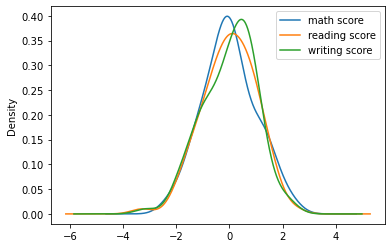

In [35]:
exam_plot = exam_data[['math score', 'reading score', 'writing score']].copy()
exam_plot.plot.kde()

## 7. Label Encoding (LabelEncoder)
Converting text into the numbers so that machine can read it. We will use LabelEncoder fron preprocessing library

In [37]:
le = preprocessing.LabelEncoder()
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))
exam_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248
5,1,group D,some high school,free/reduced,none,-1.145810,-1.508227,-1.840397
6,1,group C,some high school,standard,none,1.565321,0.797248,0.255069
7,1,group C,associate's degree,standard,none,0.637829,0.945989,0.688613
8,0,group B,some high school,standard,none,-1.074464,-1.731338,-1.334595
9,1,group A,some college,standard,none,-1.787920,-3.293112,-3.141031


In [38]:
print(le.classes_)

['female' 'male']


## 8. One Hot Encoding (pd.get_dummies)

1. It is used when thereis no meaningful comparison between the values of the column
2. Creat new column for each unique value for the specified feature in the dataset

In [40]:
exam_data = pd.get_dummies(exam_data, columns=['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
exam_data.head(10)

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0.994557,0.574138,1.049901,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
1,0,-0.646391,-0.169564,-0.178476,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
2,1,1.493976,0.053547,0.544099,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0.209756,0.797248,0.688613,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,-1.145810,0.053547,-0.395248,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
5,1,-1.145810,-1.508227,-1.840397,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
6,1,1.565321,0.797248,0.255069,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
7,1,0.637829,0.945989,0.688613,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
8,0,-1.074464,-1.731338,-1.334595,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
9,1,-1.787920,-3.293112,-3.141031,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1


## That's it for Data Preprocessing, Now heading towards ML Algorithms